# Homework set 2

Please **submit this Jupyter notebook through Canvas** no later than **Thursday November 14**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. On canvas there are hints about creating a nice pdf version.**

Before you hand in, please make sure the notebook runs, by running "Restart kernel and run all cells..." from the Kernel menu.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Zoë Azra Blei - 15762467
Costanza D'Ercole - 15424596

Run the following cell to import NumPy, Matplotlib and some other functions.

In [1]:
import math
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

---

# Very short introduction to Matplotlib

`matplotlib` is a useful package for visualizing data using Python. Run the first cell below to plot $\sqrt{x}, x, x^2, x^3$ for $x \in [1, 10]$.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


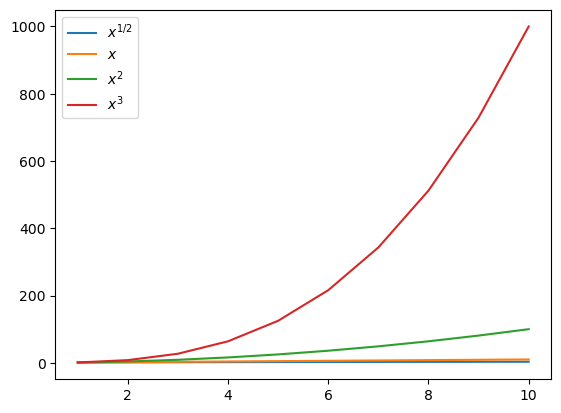

In [2]:
x = np.linspace(1, 10, 10)  # 10 points evenly between 1 and 10.
print(x)
plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When visualizing functions where $y$ has many different orders of magnitude, a logarithmic scale is useful:

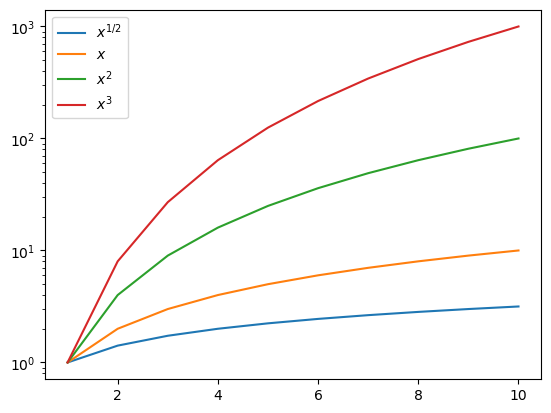

In [3]:
x = np.linspace(1, 10, 10)
plt.semilogy(x, x**0.5, label=r"$x^{1/2}$")
plt.semilogy(x, x**1, label=r"$x$")
plt.semilogy(x, x**2, label=r"$x^2$")
plt.semilogy(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When also the $x$-axis contains many orders of magnitude, a log-log plot is most useful:

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


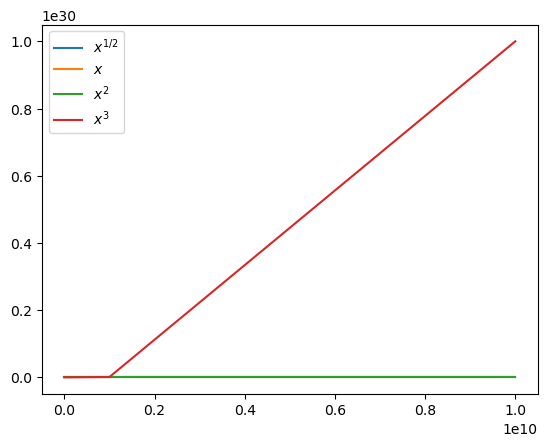

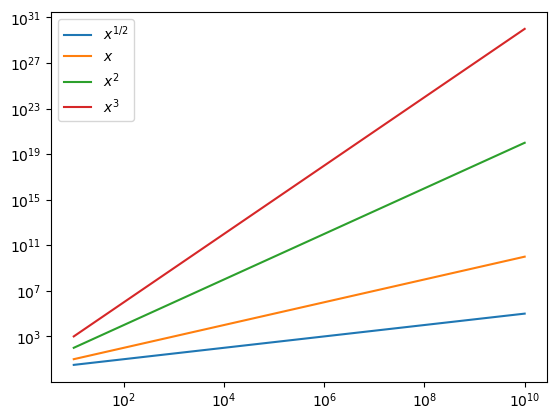

In [4]:
x = np.logspace(1, 10, 10, base=10)  # 10 points evenly between 10^1 and 10^10.
print(x)

plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

plt.loglog(x, x**0.5, label=r"$x^{1/2}$")
plt.loglog(x, x**1, label=r"$x$")
plt.loglog(x, x**2, label=r"$x^2$")
plt.loglog(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

## Plots of arbitrary curves in the $(x,y)$ plane

So far, in all our plots, $y$ was a function of $x$. But this is not the only possibility. One can draw arbitrary curves in the $(x,y)$ plane. Next are two examples

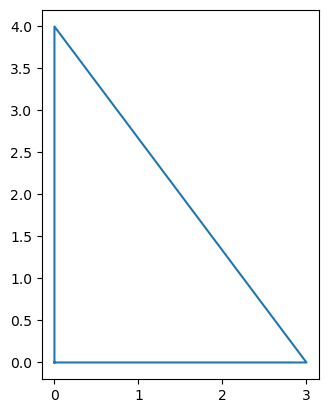

In [13]:
# plot a triangle
x = [0, 3, 0, 0]
y = [0, 0, 4, 0]
plt.plot(x,y)
# set aspect ratio to one
plt.gca().set_aspect('equal')

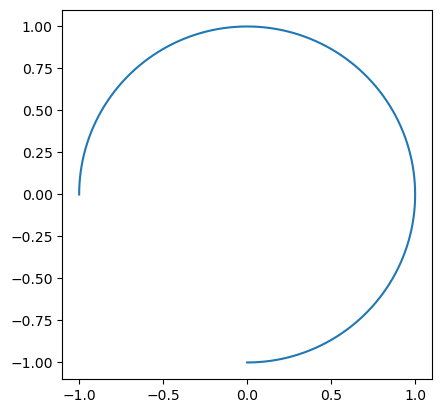

In [21]:
# we plot three quarters of a circle from (0,-1) going counter clockwise to (-1,0)
t = np.linspace(-0.5*np.pi, np.pi, 271)
x = np.cos(t)    
y = np.sin(t)
plt.plot(x,y)
# set the aspectratio to 1 so that it truely looks like a circle
plt.gca().set_aspect('equal')

---

# Exercise 1

Show that the Gram–Schmidt orthogonalization of an $m \times m$ matrix requires approximately $m^3$ multiplications and $m^3$ additions.


To show that the Gram-Schmidt orthogonalization of a $m \times m$ matrix requires approximately $m^3$ multiplications and $m^3$ additions, we can analyze the process step-by-step.
1. The classical Gram-Schmidt orthogonalization algorithm loops over each column $j$.
2. For each column $j$ ($1 \le j \le k-1$) it computes $r_{jk}=q_j^Ta_k$, which involves $m$ multiplications and $m-1$ additions (dot product).
3. The value of $q_k$ is updated as $q_k = q_k - r_{jk}q_k$, which requires $m$ multiplications and $m$ additions.

The total cost for each column $j$ is then:
$(k-1)\times 2m$ multiplications and $(k-1) \times (2m-1)$ additions.\
The total number of multiplications for orthogonalizing $m$ columns is: \\
\begin{equation}
    \sum_{k=2}^m 2m(k-1)=2m \sum_{k=1}^{m-1}k=2m \cdot \frac{(m-1)m}{2}=m^3-m^2
\end{equation}
The total number of additions is:\\
\begin{equation}
    \sum_{k=2}^m (2m-1)(k-1)=(2m-1) \sum_{k=1}^{m-1}k=(2m-1) \cdot \frac{(m-1)m}{2}=m^3-\frac{3}{2}m^2+ \frac{1}{2}m
\end{equation}

Subsequently, each column has to be normalized. To do so:
1. The algorithm computes $r_{kk}= ||q_k||_2$, which requires $m$ multiplications and $m-1$ additions.
2. Compute $q_k=q_k/r_{kk}$, involving $m$ multiplications.\

The total cost of normalization for $m$ columns is:
$m \times (m^2) = m^3$ multiplications and $m \times (m-1)=m^2-m$ additions.\

Finally, the total cost is given by:
$m^33-m^2+m^3 \sim 2m^3$ multiplications and $m^3-\frac{3}{2}m^2+ \frac{1}{2}m+m^2-m \sim m^3$ additions.

-----
# Exercise 2
We want to reconstruct a function $s(t)$ (also called the signal in this exercise), $t \in [0,1]$, from data given by
$$d(t) = \int_0^1 s(t) \, dt + \text{noise}.$$
We assume the data is given at $n$ equally space time points $t_j = j h$, $h = \frac{1}{n}$, $j=1,2, \ldots, n$. The data is therefore a vector $d = [d_1, \ldots, d_n]$, where $d_j$ denotes the value at $t_j$. 
The signal $s$ is to be reconstructed at time points 
$t_{j-1/2} = (j-1/2)h$ for $j = 1,2, \ldots, n$. It is described by a vector $s = [s_1, \ldots, s_n]$ with $s_j$ the value at $t_{j-1/2}$.
Numerical integration is described in Chapter 8 of the book by Heath. Using the composite midpoint rule, the vectors $s$ and $d$ are related by
$$d = A \cdot s + \text{noise}$$
where
$$A = \begin{bmatrix} 
h & 0 & 0 & \ldots & 0 \\
h & h & 0 & \ldots & 0 \\
h & h & h & \ddots &  \vdots \\
\vdots & \vdots & \ddots & \ddots & 0 \\
h & h & \ldots & h  & h 
\end{bmatrix}.$$


## (a)
As a test signal we take
$$s_{\rm true}(t) = \left\{
\begin{array}{ll} 
1 & \text{if $0.05 \le |t-1/2|<0.15$}\\
0.7 & \text{if $|t-1/2|<0.05$}\\
0 & \text{otherwise} \end{array} 
\right. .$$ 
Generate data $d_0$ without noise and data $d_\epsilon$ with noise, where the noise is normally distributed, with mean zero and standard deviation $\epsilon = 0.005$.
Take for example $n=100$. Plot the data.

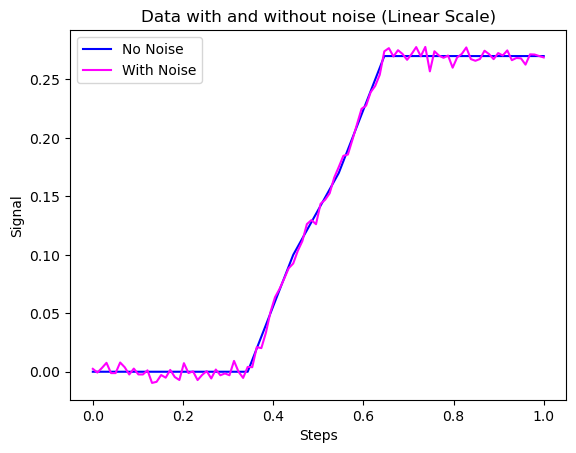

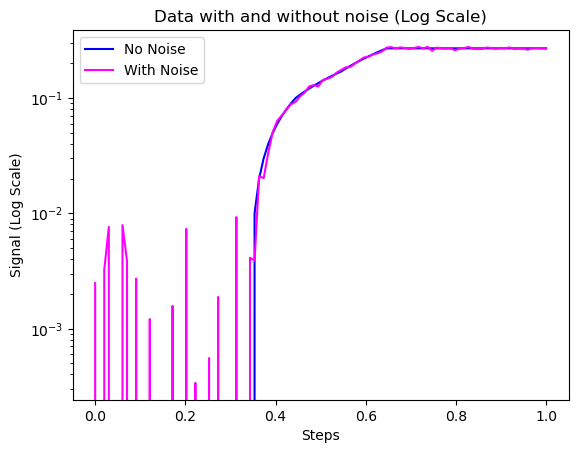

[[0.01 0.   0.   ... 0.   0.   0.  ]
 [0.01 0.01 0.   ... 0.   0.   0.  ]
 [0.01 0.01 0.01 ... 0.   0.   0.  ]
 ...
 [0.01 0.01 0.01 ... 0.01 0.   0.  ]
 [0.01 0.01 0.01 ... 0.01 0.01 0.  ]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]]


In [62]:
# YOUR CODE HERE
steps = np.linspace(0, 100, 100)
n = 100
h = 1/n
np.random.seed(42)
noise = np.random.normal(0, 0.005, n)
matrix = h * np.ones((n, n))
A = np.tril(matrix)

s_list = []
t_list = []
for j in steps:
    t = j*h
    if (0.05 <= np.abs(t - 1/2)) and (np.abs(t - 1/2) < 0.15):
        s = 1
        s_list.append(s)
        t_list.append(t)
    elif np.abs(t - 1/2) < 0.05:
        s = 0.7
        s_list.append(s)
        t_list.append(t)
    else:
        s = 0
        s_list.append(s)
        t_list.append(t)

d0 = A @ s_list
de = A @ s_list + noise


plt.figure()
plt.plot(t_list, d0, label="No Noise", color='blue')
plt.plot(t_list, de, label="With Noise", color='magenta')
plt.xlabel("Steps")
plt.ylabel("Signal")
plt.legend()
plt.title("Data with and without noise (Linear Scale)")
plt.show()

plt.figure()
plt.semilogy(t_list, d0, label="No Noise", color='blue')
plt.semilogy(t_list, de, label="With Noise", color='magenta')
plt.xlabel("Steps")
plt.ylabel("Signal (Log Scale)")
plt.legend()
plt.title("Data with and without noise (Log Scale)")
plt.show()





## (b)
Try to determine $s$ from $d_0$ by inverting the matrix $A$, ignoring the noise term.
Do the same with $d_\epsilon$ instead of $d_0$. Plot the results. What do you observe about the errors in the inversion?

You may use a library routine for matrix inversion/solving a linear system.

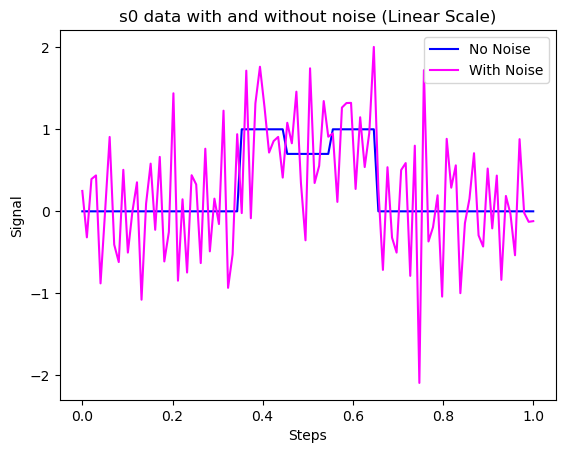

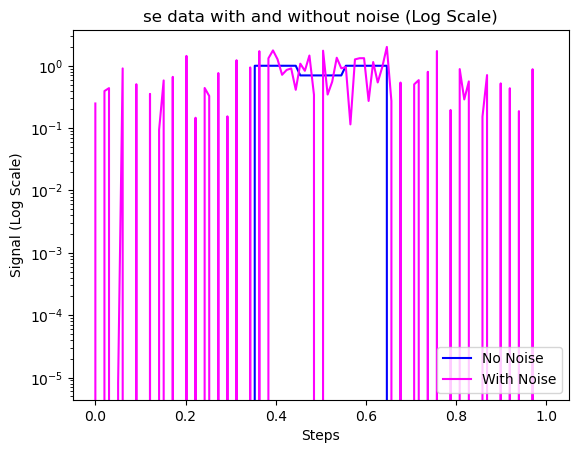

In [45]:
# YOUR CODE HERE
A_inv = np.linalg.inv(A)
s0 = A_inv @ d0
se = A_inv @ de

plt.figure()
plt.plot(t_list, s0, label="No Noise", color='blue')
plt.plot(t_list, se, label="With Noise", color='magenta')
plt.xlabel("Steps")
plt.ylabel("Signal")
plt.legend()
plt.title("s0 data with and without noise (Linear Scale)")
plt.show()

plt.figure()
plt.semilogy(t_list, s0, label="No Noise", color ='blue')
plt.semilogy(t_list, se, label="With Noise", color='magenta')
plt.xlabel("Steps")
plt.ylabel("Signal (Log Scale)")
plt.legend()
plt.title("se data with and without noise (Log Scale)")
plt.show()

## (c)
One way to address the issue just observed is by truncated SVD regularization. Suppose $A = U \Sigma V^T$ is the singular value decomposition of $A$. 

Express the inverse $A^{-1}$ in terms of $U, V$ and $\Sigma$, or in terms of $U$, $V$ and the singular values.

Let $k$ be some integer less or equal than $n$. Denote by $B_k$ the matrix that is obtained from $A$ by setting the smallest $n-k$ singular values to zero (and keeping $U$, $V$ and the first $k$ singular values the same). 

In truncated SVD regularization, an estimate for $s$ is obtained by applying the pseudoinverse $B_k^{+}$ to the data (instead of the true inverse $A^{-1}$) (see section 3.6 of Heath). Try truncated SVD regularization for various values of $k$. Show that for certain values of $k$ the result obtained by truncated SVD regularization is a "better" approximation of the true signal than the result obtained by the true inverse $A^{-1}$.
Note that better can mean different things, it can mean "visually better" or "quantitatively better" in some norm to be specified, try to be precise in what you write down.

What happens if you choose $k$ too small?

You may use library routines to compute the SVD.

*Text part of your answer here*

In [66]:
U, S, V_trans = np.linalg.svd(A)
S_diag = np.diag(S)

m, n = A.shape
S_psinv = np.zeros((n,m))
for i in range(len(S)):
    if S[i] != 0:
        S_psinv[i, i] = 1 / S[i]

A_psinv = V_trans.T @ S_psinv @ U.T
print("This is the pseudoinverse of A: \n" , A_psinv)

n = 100
k = 99

print(S) 
S[k:] = 0
Bk = U @ np.diag(S) @ V_trans
print(Bk)




This is the pseudoinverse of A: 
 [[ 1.00000000e+02 -4.13863814e-13  4.28787042e-13 ... -6.20145188e-15
  -3.72863287e-16 -1.61881868e-15]
 [-1.00000000e+02  1.00000000e+02 -2.59752720e-13 ... -5.19066462e-15
  -3.44994618e-14 -1.78918231e-15]
 [ 2.65172703e-13 -1.00000000e+02  1.00000000e+02 ... -3.32132070e-14
   3.97589901e-14 -3.47096857e-14]
 ...
 [-2.02434101e-15 -8.17795310e-14  2.78551804e-14 ...  1.00000000e+02
   1.19998539e-13 -6.74950872e-14]
 [ 3.08013523e-14  7.18443205e-14  7.70336095e-14 ... -1.00000000e+02
   1.00000000e+02  9.12365580e-14]
 [ 8.58434035e-14  7.80524129e-14 -3.15203633e-14 ... -1.79039307e-13
  -1.00000000e+02  1.00000000e+02]]
[0.63980938 0.21328716 0.12799314 0.09144601 0.07114785 0.0582356
 0.04930037 0.04275137 0.0377464  0.03379789 0.030604   0.02796787
 0.02575565 0.02387316 0.02225217 0.02084208 0.01960456 0.01851002
 0.0175353  0.01666197 0.01587519 0.0151629  0.01451518 0.0139238
 0.01338186 0.01288355 0.01242395 0.01199884 0.0116046  0.011238

the pseudoinverse for A is equal to the inverse of A. it is defined as:
A_inverse = V * sigma_inverse U_transpose

the pseudoinverse of a scalar sigma is:

if sigma != 0:
    1/sigma
else:
    0

## (d)

Make a plot of the singular values of $A$. Explain your findings in (b) and (c). Part of your explanation should refer to the plot.

*Text part of your answer here*